# DIP Assignment 4
### Brahad Kokad - 2021112004

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Q1

In [ ]:
# Task (a)

image_path = "../images/derek_layla.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found.")

# Apply Binary Thresholding
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Apply Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

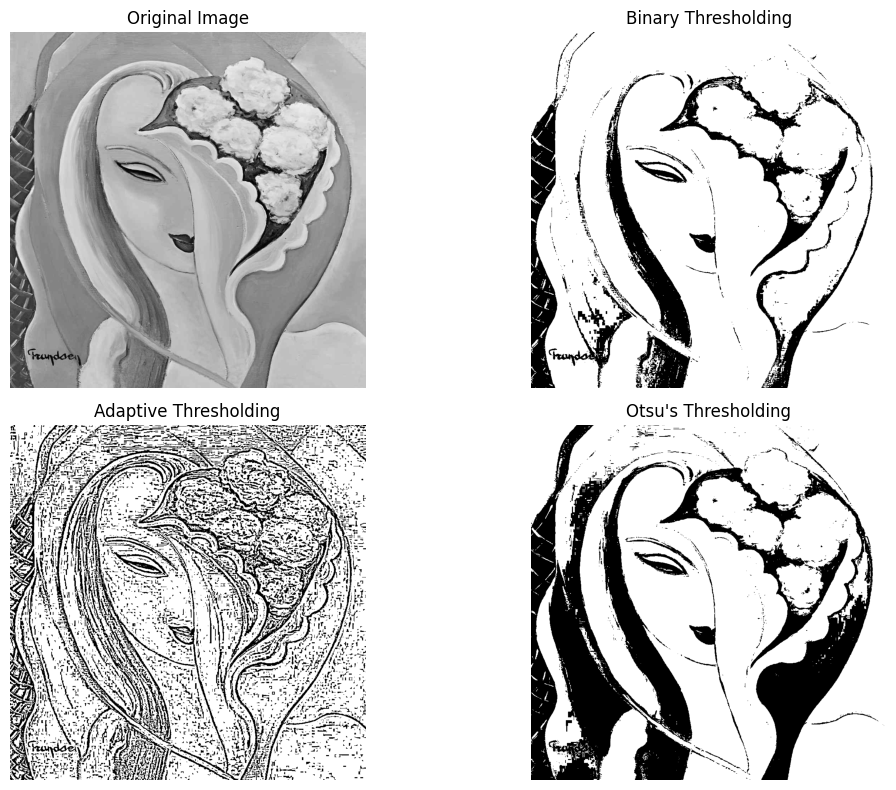

In [ ]:
# Task (b)

plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Binary Thresholding Result
plt.subplot(2, 2, 2)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Thresholding")
plt.axis("off")

# Adaptive Thresholding Result
plt.subplot(2, 2, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")

# Otsu's Thresholding Result
plt.subplot(2, 2, 4)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")

# Show all images
plt.tight_layout()
plt.show()

### (c) Discussion
- Binary Thresholding provides a simple segmentation but may not handle varying lighting well.
- Adaptive Thresholding is better for images with non-uniform illumination, as it calculates thresholds for small regions.
- Otsu’s Thresholding is ideal when there's a clear bimodal distribution in pixel intensities, giving sharp object boundaries.

# Q2

In [16]:
# Task 2(a)

def detect_lines(image_path, canny_threshold1=50, canny_threshold2=150, hough_threshold=300):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the file path.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray, canny_threshold1, canny_threshold2)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, hough_threshold)

    # Draw the lines on the original image
    line_image = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 5)

    return image, edges, line_image

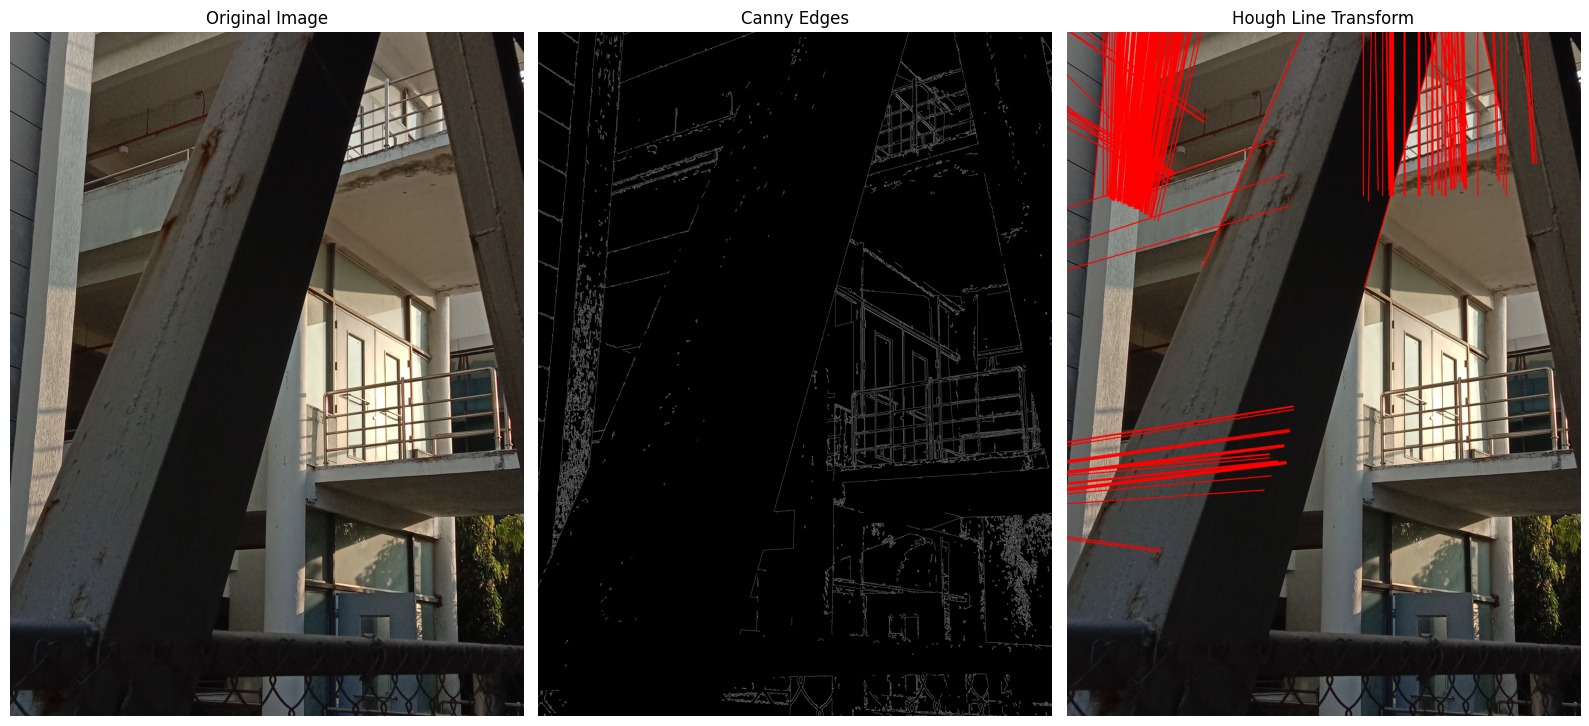

In [ ]:
# Task 2(b): Test the function
image_path = "../images/lines_kcis.jpg"
original, edges, line_detected = detect_lines(image_path)

# Display the images
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Edges
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

# Line Detection
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(line_detected, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform")
plt.axis("off")

plt.tight_layout()
plt.show()

### 2(c): Discussion
- Increasing the Hough threshold reduces noise but may miss faint lines.
- Lowering the threshold detects more lines, but it can lead to false positives.
- Experimenting with different parameters can optimize detection based on the image complexity.

# Q3

In [14]:
# Task 3(a)

def detect_circles(image_path, param2, dp=1.2, min_dist=30, param1=50, min_radius=0, max_radius=0):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the file path.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (9, 9), 1)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, min_dist,
                               param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)

    # Draw the circles on the original image
    circle_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Circle center
            radius = circle[2]  # Circle radius
            # Draw circle center
            cv2.circle(circle_image, center, 3, (0, 255, 0), -1)
            # Draw circle perimeter
            cv2.circle(circle_image, center, radius, (255, 0, 0), 5)

    return image, blurred, circle_image

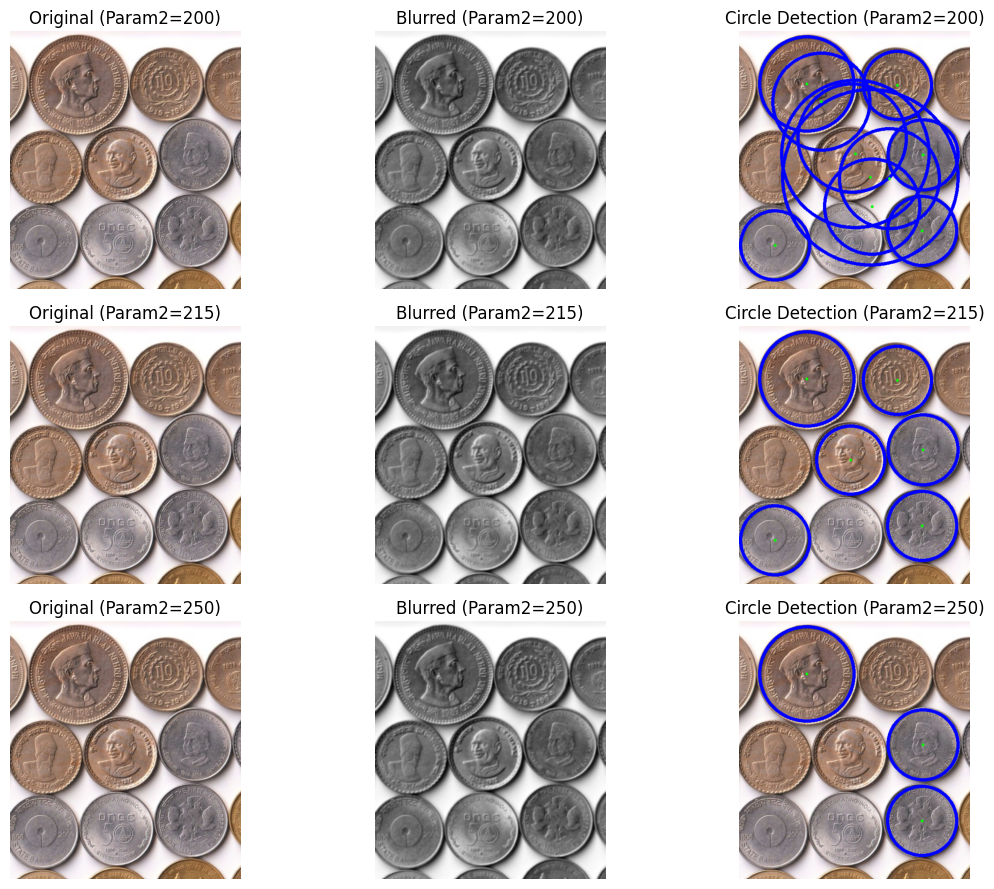

In [ ]:
# 3(b)

image_path = "../images/coins.jpg"
param2_values = [200, 215, 250]  # Different param2 values to experiment with

# Prepare the plot
plt.figure(figsize=(12, 9))

for idx, param2 in enumerate(param2_values):
    # Detect circles using the current param2 value
    original, blurred, circle_detected = detect_circles(image_path, param2=param2)

    # Plot the original image
    plt.subplot(len(param2_values), 3, 3 * idx + 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original (Param2={param2})")
    plt.axis("off")

    # Plot the blurred image
    plt.subplot(len(param2_values), 3, 3 * idx + 2)
    plt.imshow(blurred, cmap='gray')
    plt.title(f"Blurred (Param2={param2})")
    plt.axis("off")

    # Plot the circle-detected image
    plt.subplot(len(param2_values), 3, 3 * idx + 3)
    plt.imshow(cv2.cvtColor(circle_detected, cv2.COLOR_BGR2RGB))
    plt.title(f"Circle Detection (Param2={param2})")
    plt.axis("off")

# Display the results
plt.tight_layout()
plt.show()


### Discussion:
- Adjusting the min and max radius helps focus on specific circle sizes, improving detection accuracy.
- Lowering accumulator thresholds (param2) detects faint circles but may increase false positives.
- Proper smoothing (Gaussian Blur) is essential for robust circle detection.

# Q4

In [15]:
# Task 4(a): Function for Harris Corner Detection
def detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the file path.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Apply Harris Corner Detection
    dst = cv2.cornerHarris(gray, block_size, ksize, k)

    # Dilate result for better visualization of corners
    dst_dilated = cv2.dilate(dst, None)

    # Create a copy of the original image to mark corners
    corners_marked = image.copy()
    corners_marked[dst_dilated > threshold * dst_dilated.max()] = [0, 0, 255]  # Mark corners in red

    return image, corners_marked

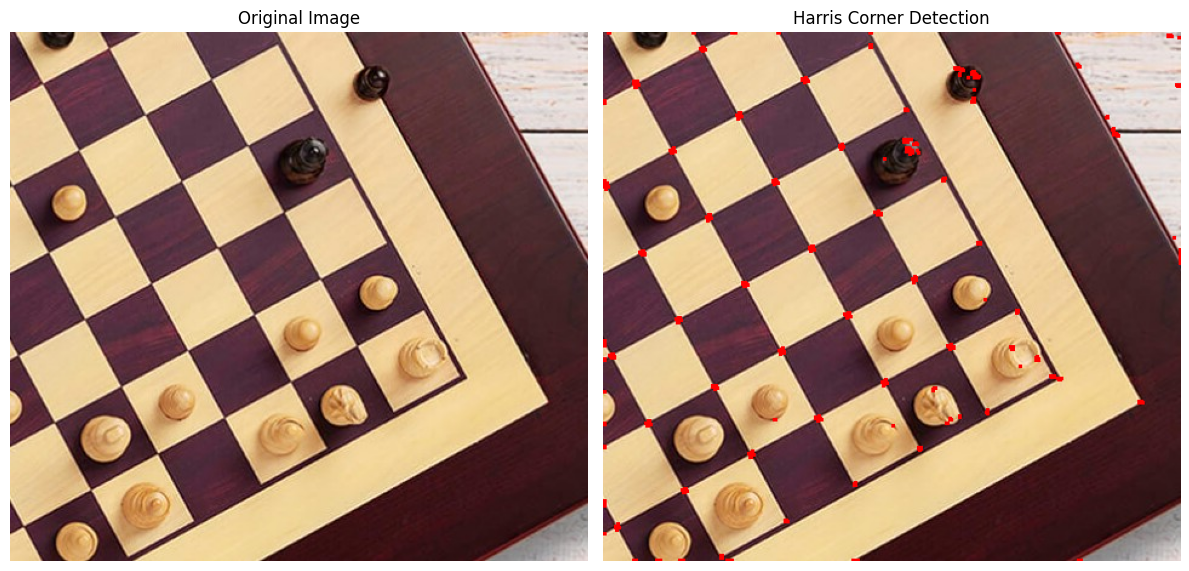

In [7]:
# Task 4(b): Apply to an image with distinct corners
image_path = "../images/chess.jpg"
original, corners_marked = detect_harris_corners(image_path)

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Image with Corners Marked
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corners_marked, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

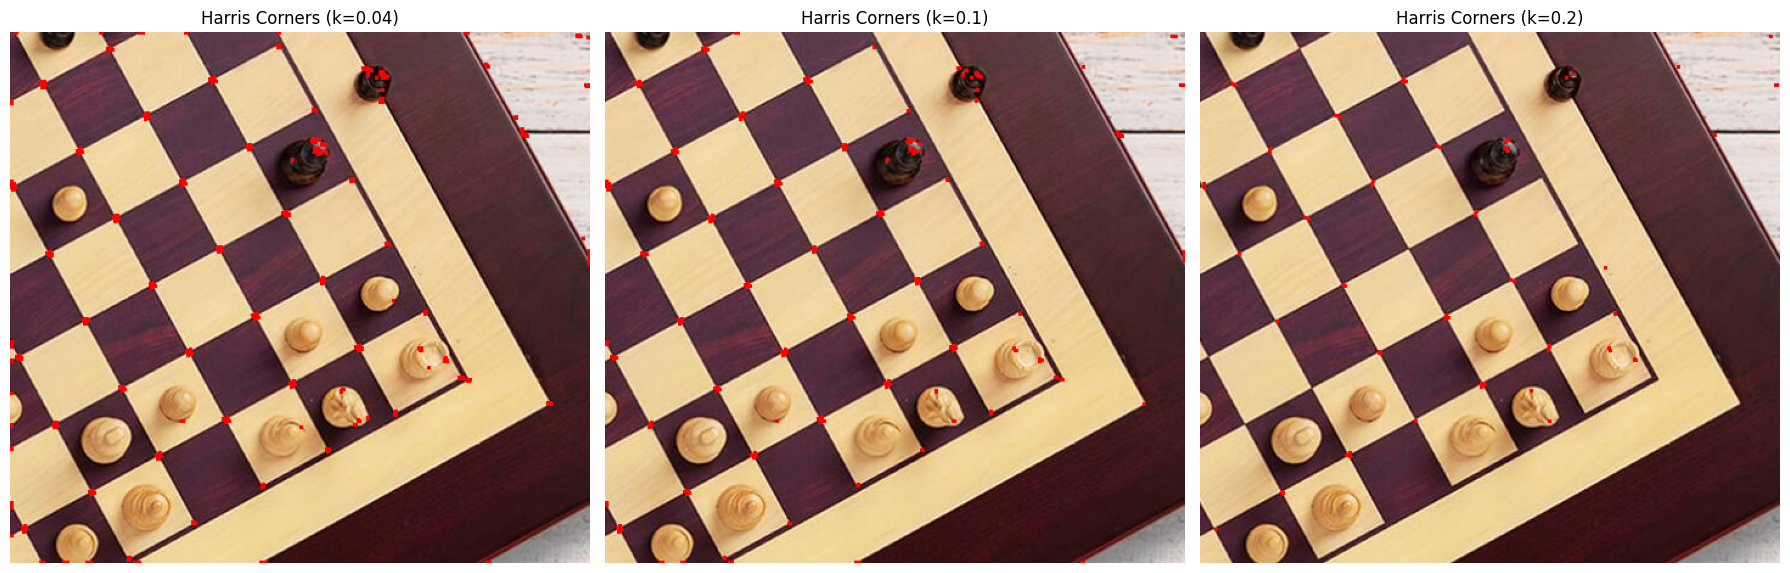

In [11]:
# Task 4(c): Experiment with varying sensitivity parameter 'k'
k_values = [0.04, 0.1, 0.2]

# Prepare plot
plt.figure(figsize=(18, 6))
for idx, k in enumerate(k_values):
    _, corners_marked_k = detect_harris_corners(image_path, k=k)
    plt.subplot(1, len(k_values), idx + 1)
    plt.imshow(cv2.cvtColor(corners_marked_k, cv2.COLOR_BGR2RGB))
    plt.title(f"Harris Corners (k={k})")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Discussion:
- Lower values of 'k' (e.g., 0.04) make the algorithm more sensitive to edges, resulting in more detected corners.
- Higher values of 'k' (e.g., 0.2) reduce sensitivity, focusing only on stronger corners and ignoring weaker features.
- Tuning 'k' is crucial for balancing corner detection and noise reduction, depending on the image complexity.

# Q5

The Hough Transform detects geometric shapes by mapping image points to a parameter space. For lines, the transform uses a two-dimensional parameter space
(
𝜌
,
𝜃
), where
ρ represents the distance from the origin to the line and
𝜃
θ is the angle of the line's normal. Detecting lines is computationally less intensive since each point in the image contributes to a simple sinusoidal curve in this space.

For circles, the parameter space is three-dimensional
(
𝑥
center
,
𝑦
center
,
𝑟
), representing the circle's center coordinates and radius. Each point in the image contributes to a cone or sphere in this space, depending on the radius range. Consequently, circle detection involves more computations and memory due to the increased dimensionality.

Thus, line detection is faster and more efficient, while circle detection requires careful parameter tuning (e.g., radius range, accumulator thresholds) to balance accuracy and computational complexity.

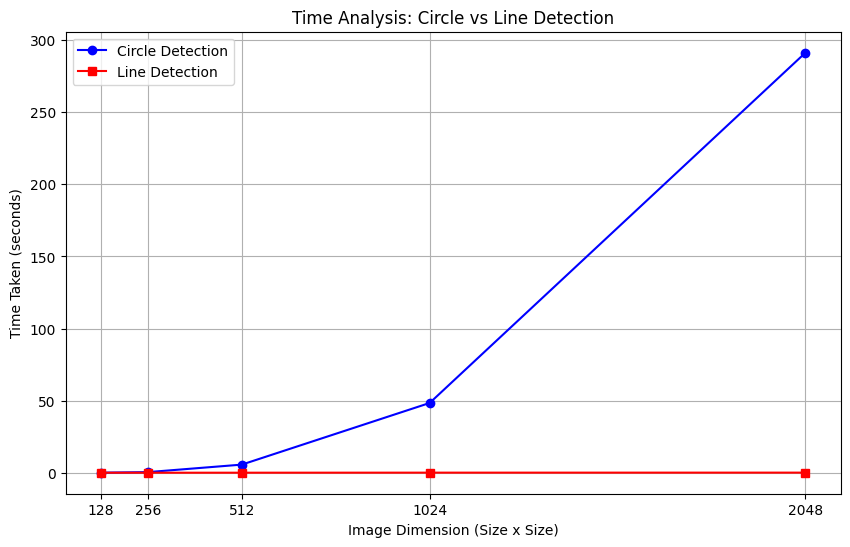

In [17]:
def analyze_detection(image_path, detect_circles_fn, detect_lines_fn):
    # Define the image sizes to test
    sizes = [128, 256, 512, 1024, 2048]  # Increasing sizes
    times_circles = []
    times_lines = []

    for size in sizes:
        # Load the original image and resize
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Image not found. Please check the file path.")
        resized_image = cv2.resize(image, (size, size))
        temp_path = f"temp_{size}x{size}.jpg"
        cv2.imwrite(temp_path, resized_image)

        # Measure time for circle detection
        start_time = time.time()
        _, _, _ = detect_circles_fn(temp_path, param2=50)
        times_circles.append(time.time() - start_time)

        # Measure time for line detection
        start_time = time.time()
        _, _, _ = detect_lines_fn(temp_path)
        times_lines.append(time.time() - start_time)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times_circles, label="Circle Detection", marker='o', color='blue')
    plt.plot(sizes, times_lines, label="Line Detection", marker='s', color='red')
    plt.title("Time Analysis: Circle vs Line Detection")
    plt.xlabel("Image Dimension (Size x Size)")
    plt.ylabel("Time Taken (seconds)")
    plt.xticks(sizes)
    plt.legend()
    plt.grid()
    plt.show()

# Run the analysis
image_path = "../images/vsauce_lego.jpg"
analyze_detection(image_path, detect_circles, detect_lines)

In the simulation above it can be seen how circle detection takes exponentially more time than line detection.